In [22]:
import pandas as pd


real_cases_df = pd.read_csv('../data/covid19/campinas_2020_2021_2022_cases.csv')

real_cases_df['date'] = pd.to_datetime(real_cases_df['date'])

real_cases_df.head()

,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
0,12,2020-03-18,SP,Campinas/SP,3509502,0,0,1,1,0.0,0.082,0.0
1,12,2020-03-19,SP,Campinas/SP,3509502,0,0,0,1,0.0,0.082,0.0
2,12,2020-03-20,SP,Campinas/SP,3509502,0,0,0,1,0.0,0.082,0.0
3,12,2020-03-21,SP,Campinas/SP,3509502,0,0,0,1,0.0,0.082,0.0
4,13,2020-03-22,SP,Campinas/SP,3509502,0,0,0,1,0.0,0.082,0.0


In [23]:
simulated_cases_df = pd.read_csv('../data/simulation/campinas_total_cases_30_accuracy.csv')

simulated_cases_df['date'] = pd.to_datetime(simulated_cases_df['date'])

simulated_cases_df.head()

,Unnamed: 0,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
0,0,12,2020-03-18,SP,Campinas/SP,3509502,0,0,0,0,0.0,0.0,0.0
1,1,12,2020-03-19,SP,Campinas/SP,3509502,0,0,0,0,0.0,0.0,0.0
2,2,12,2020-03-20,SP,Campinas/SP,3509502,0,0,0,0,0.0,0.0,0.0
3,3,12,2020-03-21,SP,Campinas/SP,3509502,0,0,0,0,0.0,0.0,0.0
4,4,13,2020-03-22,SP,Campinas/SP,3509502,0,0,0,0,0.0,0.0,0.0


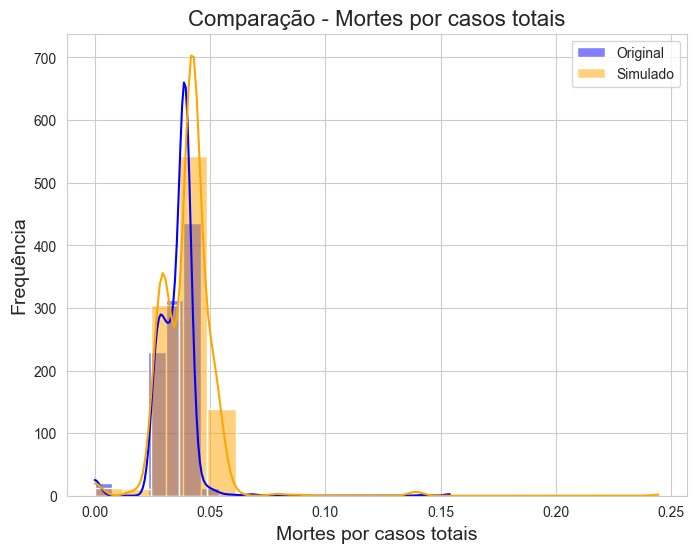

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))

sns.histplot(real_cases_df['deaths_by_totalCases'], bins=20, kde=True, label='Original', color='blue')
sns.histplot(simulated_cases_df['deaths_by_totalCases'], bins=20, kde=True, label='Simulado', color='orange')

plt.title('Comparação - Mortes por casos totais', fontsize=16)
plt.xlabel('Mortes por casos totais', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

plt.legend()

plt.show()

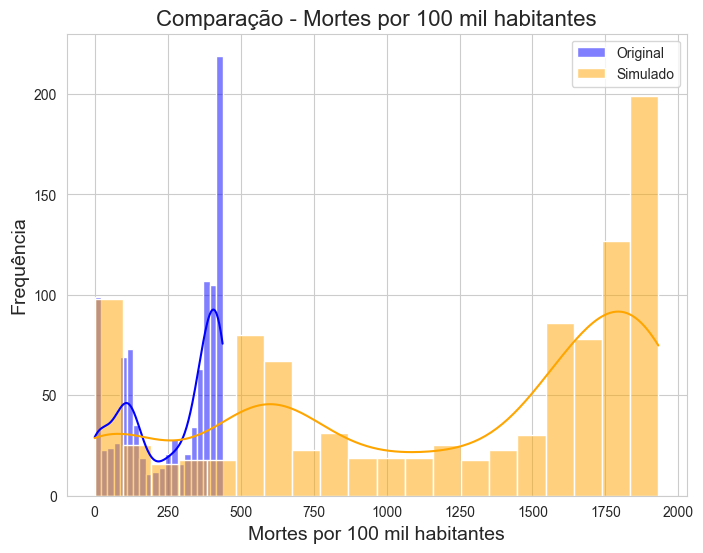

In [25]:
plt.figure(figsize=(8, 6))

sns.histplot(real_cases_df['deaths_per_100k_inhabitants'], bins=20, kde=True, label='Original', color='blue')
sns.histplot(simulated_cases_df['deaths_per_100k_inhabitants'], bins=20, kde=True, label='Simulado', color='orange', alpha=0.5)

plt.title('Comparação - Mortes por 100 mil habitantes', fontsize=16)
plt.xlabel('Mortes por 100 mil habitantes', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

plt.legend()

plt.show()


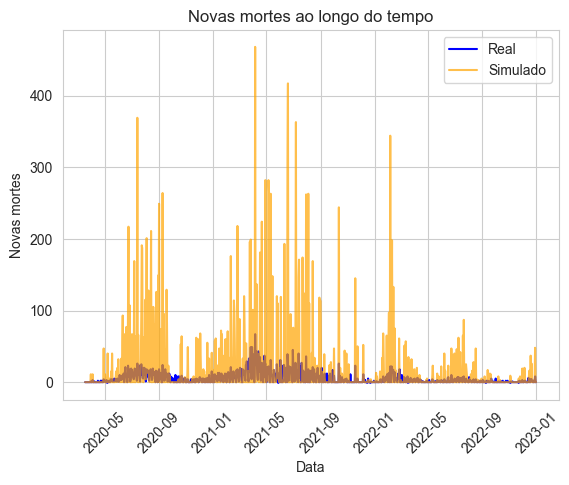

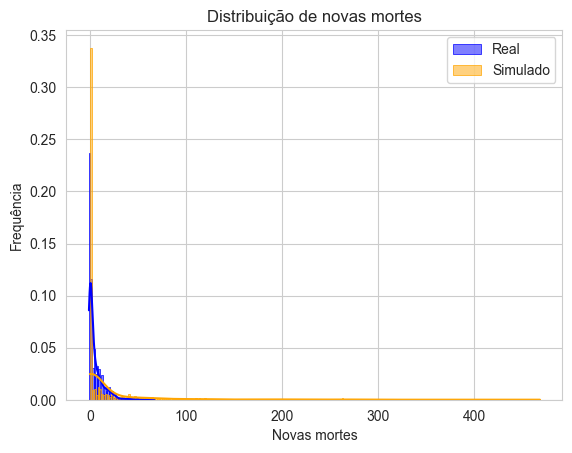

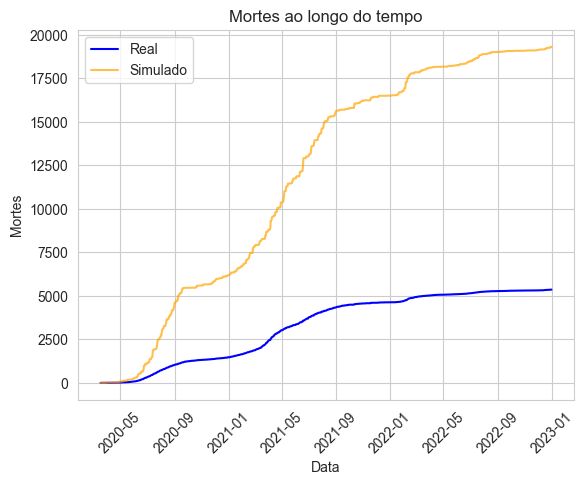

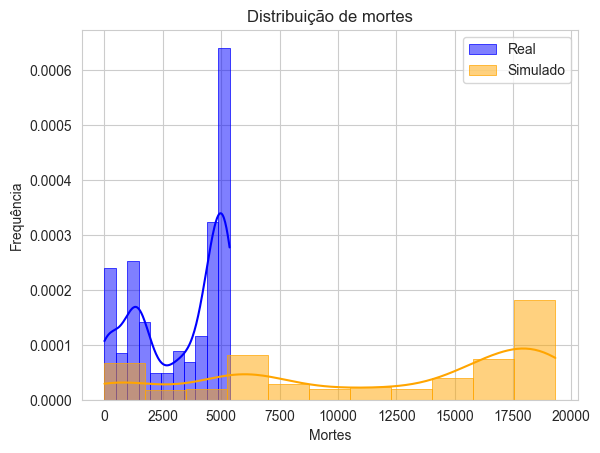

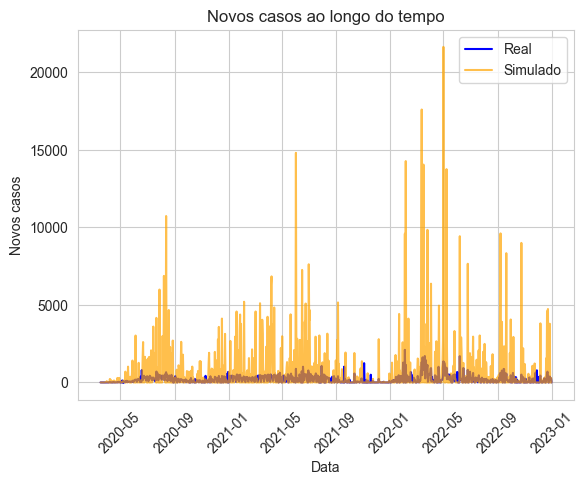

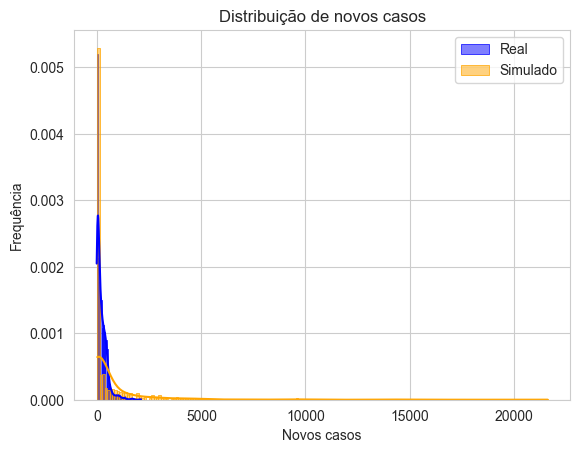

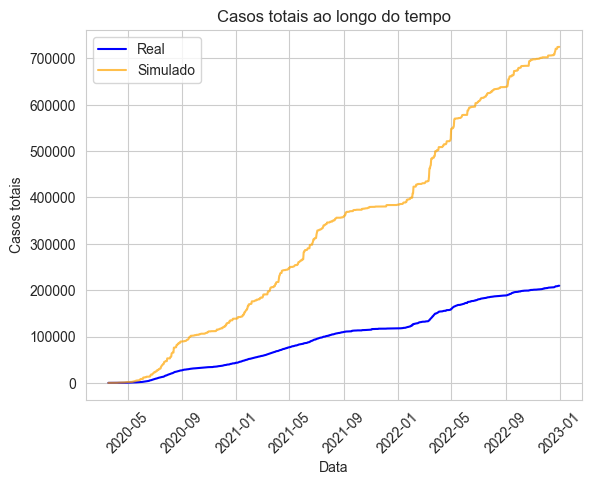

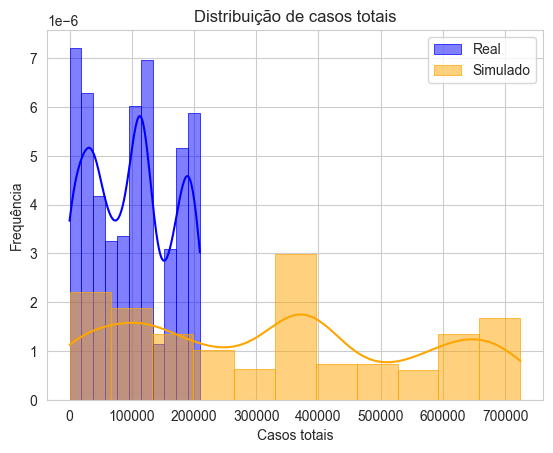

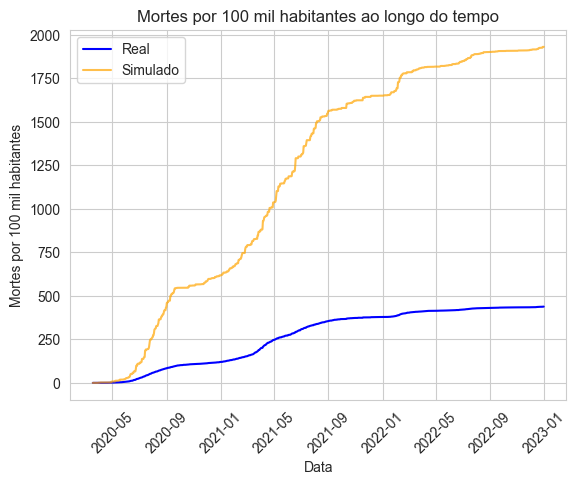

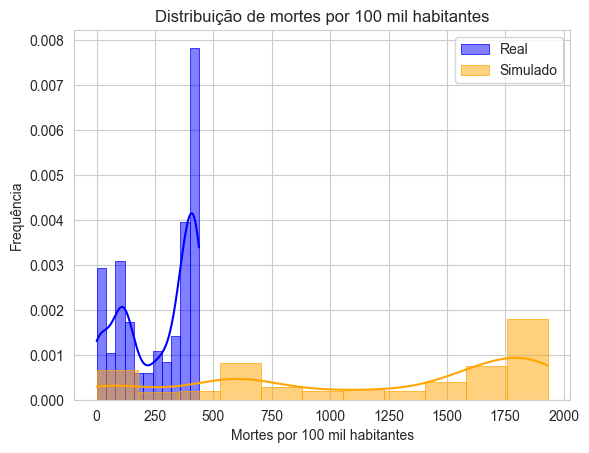

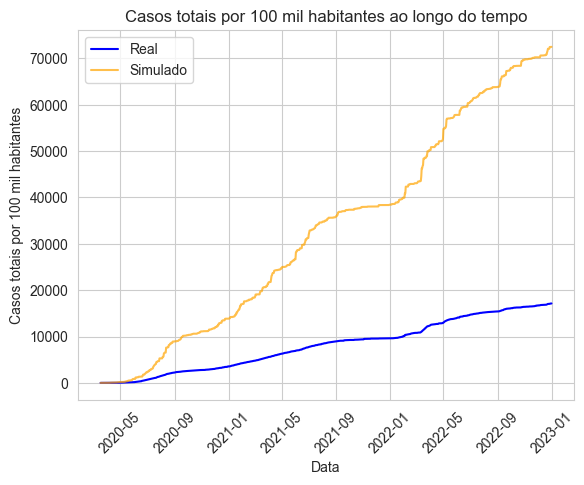

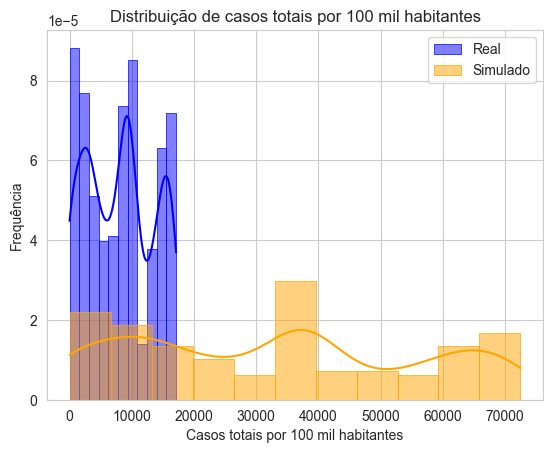

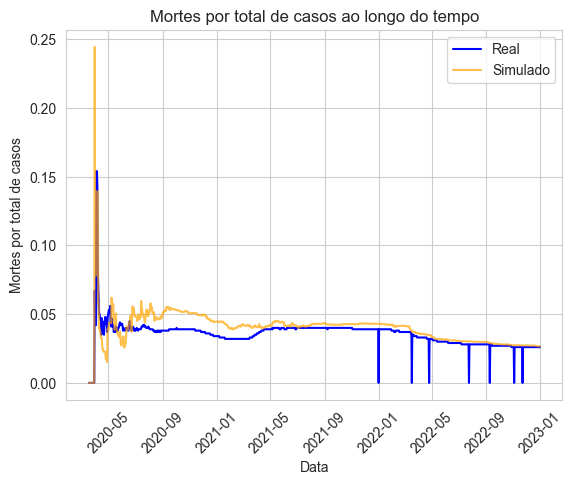

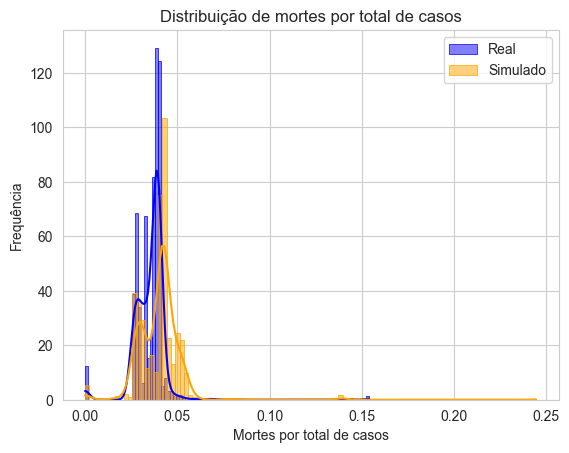

In [26]:
portuguese_labels = {
    "newDeaths": "Novas mortes",
    "deaths": "Mortes",
    "newCases": "Novos casos",
    "totalCases": "Casos totais",
    "deaths_per_100k_inhabitants": "Mortes por 100 mil habitantes",
    "totalCases_per_100k_inhabitants": "Casos totais por 100 mil habitantes",
    "deaths_by_totalCases": "Mortes por total de casos"
}

columns_to_plot = [
    "newDeaths", "deaths", "newCases", "totalCases", 
    "deaths_per_100k_inhabitants", "totalCases_per_100k_inhabitants", 
    "deaths_by_totalCases"
]


for column in columns_to_plot:
    sns.lineplot(data=real_cases_df, x="date", y=column, label="Real", color="blue")
    sns.lineplot(data=simulated_cases_df, x="date", y=column, label="Simulado", color="orange", alpha=0.7)
    plt.title(f"{portuguese_labels[column]} ao longo do tempo")
    plt.ylabel(portuguese_labels[column])
    plt.xlabel("Data")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    sns.histplot(data=real_cases_df, x=column, color="blue", label="Real", kde=True, stat="density", edgecolor="blue", linewidth=0.5)
    sns.histplot(data=simulated_cases_df, x=column, color="orange", label="Simulado", kde=True, stat="density", linewidth=0.5, edgecolor="orange", alpha=0.5)
    plt.title(f"Distribuição de {portuguese_labels[column].lower()}")
    plt.xlabel(portuguese_labels[column])
    plt.ylabel("Frequência")
    plt.legend()
    plt.show()
